In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import os
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC, LinearSVC
from sklearn.externals import joblib
from scipy.ndimage.measurements import label
import time

# Color Features

In [2]:
# img = cv2.imread('/Users/ryank/Documents/datasets/vehicles/GTI_MiddleClose/image0000.png')
img = cv2.imread('/hdd/datasets/vehicle_detection_data/vehicles/GTI_MiddleClose/image0000.png')
# img = cv2.imread('data/vehicles/GTI_MiddleClose/image0000.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

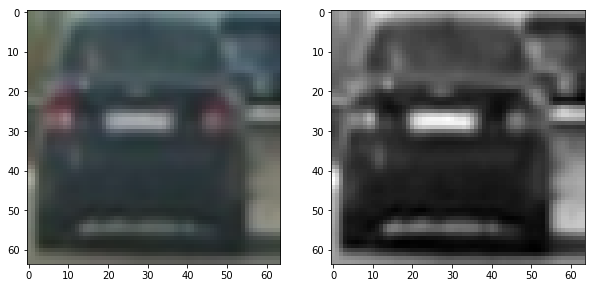

In [3]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img[:,:,::-1])
plt.subplot(122)
plt.imshow(gray, cmap='gray')

In [4]:
# Define a function to compute color histogram features 
# NEED TO CHANGE bins_range if reading .png files with mpimg!
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

In [5]:
color_features = color_hist(img)

<Container object of 96 artists>

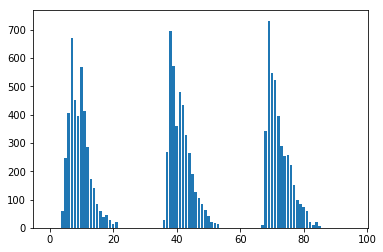

In [6]:
plt.bar(np.arange(len(color_features)), color_features)

In [7]:
# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

In [8]:
spatial_features = bin_spatial(img, size=(8,8))

<Container object of 192 artists>

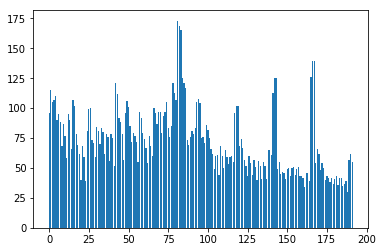

In [9]:
plt.bar(np.arange(len(spatial_features)), spatial_features)

# Gradient Features

In [10]:
# img = cv2.imread('/Users/ryank/Documents/datasets/vehicles/GTI_MiddleClose/image0000.png')
img = cv2.imread('/hdd/datasets/vehicle_detection_data/vehicles/GTI_MiddleClose/image0000.png')
# img = cv2.imread('data/vehicles/GTI_MiddleClose/image0000.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

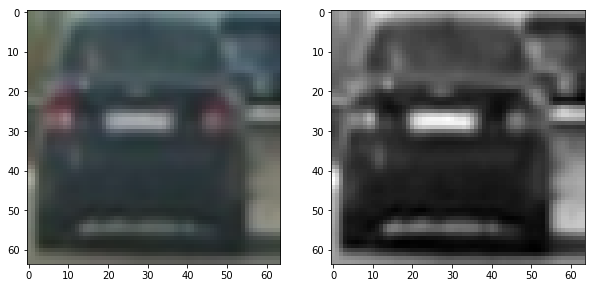

In [11]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img[:,:,::-1])
plt.subplot(122)
plt.imshow(gray, cmap='gray')

In [12]:
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    else:      # Otherwise call with one output
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

In [13]:
pix_per_cell = 16
cell_per_block = 4
orient = 10

hog_features = get_hog_features(gray, orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block)

/home/ryan/.conda/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


<Container object of 160 artists>

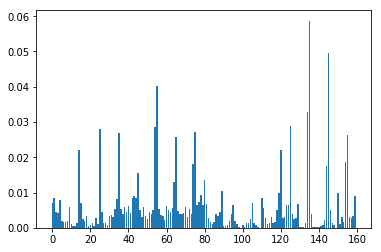

In [14]:
plt.bar(np.arange(len(hog_features)), hog_features)

In [15]:
color_space = 'YUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 11
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = "ALL" # Can

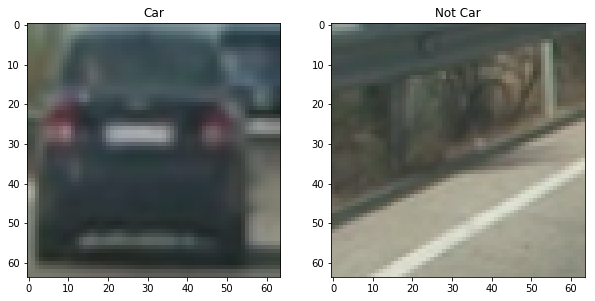

In [16]:
car_image = cv2.imread('/hdd/datasets/vehicle_detection_data/vehicles/GTI_MiddleClose/image0000.png')
notcar_image = cv2.imread('/hdd/datasets/vehicle_detection_data/non-vehicles/GTI/image1000.png')

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('Car')
plt.imshow(car_image[:,:,::-1])
plt.subplot(122)
plt.title('Not Car')
plt.imshow(notcar_image[:,:,::-1])
plt.savefig('output_images/car_not_car.png', bbox_inches='tight')

/home/ryan/.conda/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


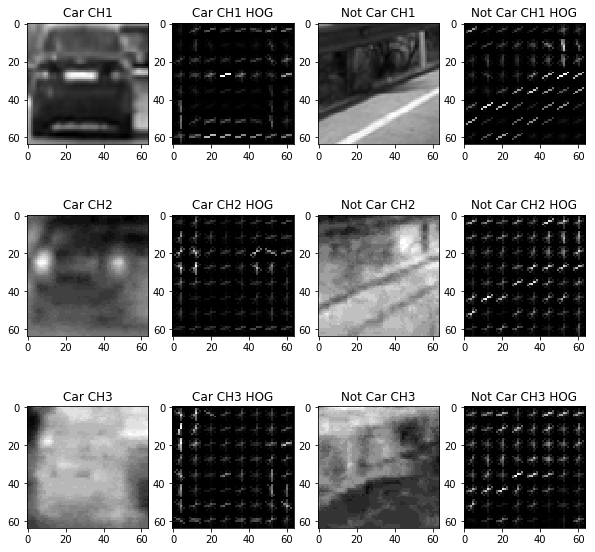

In [17]:
car_image = cv2.imread('/hdd/datasets/vehicle_detection_data/vehicles/GTI_MiddleClose/image0000.png')
car_image = cv2.cvtColor(car_image, cv2.COLOR_BGR2YUV)
notcar_image = cv2.imread('/hdd/datasets/vehicle_detection_data/non-vehicles/GTI/image1000.png')
notcar_image = cv2.cvtColor(notcar_image, cv2.COLOR_BGR2YUV)

_, car_ch1_hog = get_hog_features(car_image[:,:,0], orient, pix_per_cell, cell_per_block, vis=True)
_, notcar_ch1_hog = get_hog_features(notcar_image[:,:,0], orient, pix_per_cell, cell_per_block, vis=True)
_, car_ch2_hog = get_hog_features(car_image[:,:,1], orient, pix_per_cell, cell_per_block, vis=True)
_, notcar_ch2_hog = get_hog_features(notcar_image[:,:,1], orient, pix_per_cell, cell_per_block, vis=True)
_, car_ch3_hog = get_hog_features(car_image[:,:,2], orient, pix_per_cell, cell_per_block, vis=True)
_, notcar_ch3_hog = get_hog_features(notcar_image[:,:,2], orient, pix_per_cell, cell_per_block, vis=True)

plt.figure(figsize=(10,10))
plt.subplot(341)
plt.title('Car CH1')
plt.imshow(car_image[:,:,0], cmap='gray')
plt.subplot(342)
plt.title('Car CH1 HOG')
plt.imshow(car_ch1_hog, cmap='gray')
plt.subplot(343)
plt.title('Not Car CH1')
plt.imshow(notcar_image[:,:,0], cmap='gray')
plt.subplot(344)
plt.title('Not Car CH1 HOG')
plt.imshow(notcar_ch1_hog, cmap='gray')

plt.subplot(345)
plt.title('Car CH2')
plt.imshow(car_image[:,:,1], cmap='gray')
plt.subplot(346)
plt.title('Car CH2 HOG')
plt.imshow(car_ch2_hog, cmap='gray')
plt.subplot(347)
plt.title('Not Car CH2')
plt.imshow(notcar_image[:,:,1], cmap='gray')
plt.subplot(348)
plt.title('Not Car CH2 HOG')
plt.imshow(notcar_ch2_hog, cmap='gray')

plt.subplot(349)
plt.title('Car CH3')
plt.imshow(car_image[:,:,2], cmap='gray')
plt.subplot(3,4,10)
plt.title('Car CH3 HOG')
plt.imshow(car_ch3_hog, cmap='gray')
plt.subplot(3,4,11)
plt.title('Not Car CH3')
plt.imshow(notcar_image[:,:,2], cmap='gray')
plt.subplot(3,4,12)
plt.title('Not Car CH3 HOG')
plt.imshow(notcar_ch3_hog, cmap='gray')

plt.savefig('output_images/HOG_example.png', bbox_inches='tight')

# Combined Features

In [18]:
# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, color_space='RGB', spatial_size=(8, 8),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = cv2.imread(file)[:,:,::-1]
        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
#                 hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
#                             pix_per_cell, cell_per_block, vis=False, feature_vec=True)
                hog_features = get_hog_features(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
        
        ###FLIP###
        file_features = []
        image = np.fliplr(image)
        feature_image = np.fliplr(feature_image)
#         feature_image = cv2.flip(feature_image,1)
        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
#                 hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
#                             pix_per_cell, cell_per_block, vis=False, feature_vec=True)
                hog_features = get_hog_features(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features

# Vehicle / Non-vehicle Training Data

In [19]:
# cars = glob.glob('data/vehicles/**/*.png')[:1000]
# notcars = glob.glob('data/non-vehicles/**/*.png')[:1000]

cars = glob.glob('/hdd/datasets/vehicle_detection_data/vehicles/**/*.png')
notcars = glob.glob('/hdd/datasets/vehicle_detection_data/non-vehicles/**/*.png')

In [20]:
print(len(cars))
print(len(notcars))

8792
8968


In [21]:
color_space = 'YUV' 
orient = 11
pix_per_cell = 8 
cell_per_block = 2 
hog_channel = "ALL" 
spatial_size = (8, 8) 
hist_bins = 32
hist_range = (0,256)
spatial_feat = True 
hist_feat = True 
hog_feat = True 

car_features = extract_features(cars, color_space=color_space, orient=orient, 
                                pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,
                                spatial_size=spatial_size, hist_bins=hist_bins,
                                hog_channel=hog_channel, spatial_feat=spatial_feat, 
                                hist_feat=hist_feat, hog_feat=hog_feat)

notcar_features = extract_features(notcars, color_space=color_space, orient=orient, 
                                pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                                spatial_size=spatial_size, hist_bins=hist_bins,
                                hog_channel=hog_channel, spatial_feat=spatial_feat, 
                                hist_feat=hist_feat, hog_feat=hog_feat)
print('# car samples:',len(car_features))
print('# notcar samples:',len(notcar_features))

/home/ryan/.conda/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


# car samples: 17584
# notcar samples: 17936


In [22]:
np.array(car_features).shape

(17584, 6756)

In [23]:
# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=22)
    
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X_train)
# Apply the scaler to X
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [24]:
X_train_scaled.shape

(28416, 6756)

In [25]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [26]:
t = time.time()
svc = LinearSVC(penalty='l1', dual=False, C=0.1)
# svc = LinearSVC()
svc.fit(X_train_scaled, y_train)
print(time.time() - t)

36.408886671066284


In [27]:
print('Test Accuracy:', round(svc.score(X_test_scaled, y_test), 3))

Test Accuracy: 0.994


In [28]:
joblib.dump(svc, 'model.pkl') 
# svc = joblib.load('model.pkl') 

['model.pkl']

In [29]:
# clf = joblib.load('model.pkl')

# Sliding Windows

In [30]:
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list

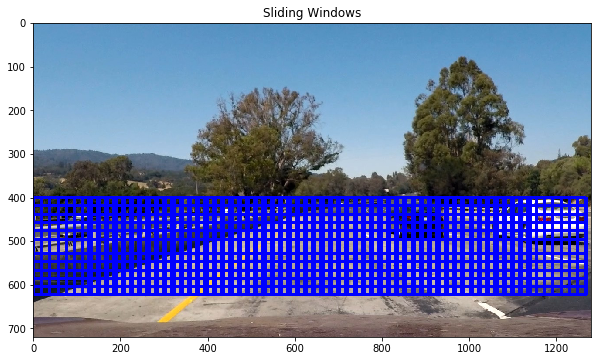

In [31]:
image = cv2.imread('test_images/test1.jpg')
windows = slide_window(image, x_start_stop=[None, None], y_start_stop=[400, 640], 
                xy_window=(128, 128), xy_overlap=(0.85, 0.85))

len(windows)
for window in windows:
    cv2.rectangle(image, window[0], window[1], (255,0,0), 5)

plt.figure(figsize=(10,10))
plt.title('Sliding Windows')
plt.imshow(image[:,:,::-1])
plt.savefig('output_images/sliding_windows.png', bbox_inches='tight')

In [32]:
# Define a function to extract features from a single image window
# This function is very similar to extract_features()
# just for a single image rather than list of images
def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):    
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)      
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        # Apply color_hist()
        hist_features = color_hist(feature_image, nbins=hist_bins)
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
#             hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
#                         pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            hog_features = get_hog_features(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True) 
        #8) Append features to list
        img_features.append(hog_features)

    #9) Return concatenated array of features
    return np.concatenate(img_features)

In [33]:
# Define a function you will pass an image 
# and the list of windows to be searched (output of slide_windows())
def search_windows(img, windows, clf, scaler, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        #4) Extract features for that window using single_img_features()
        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        #5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        #6) Predict using your classifier
        prediction = svc.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows

In [34]:
# Define a function to draw bounding boxes
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy


/home/ryan/.conda/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


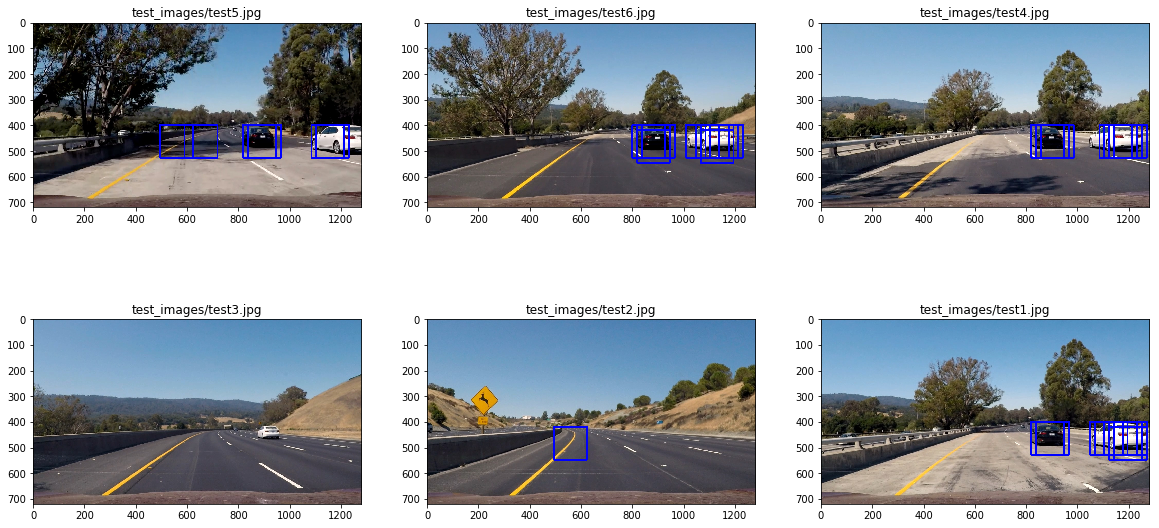

In [35]:
imgs = glob.glob('test_images/test*.jpg')

plt.figure(figsize=(20,10))
for i, im in enumerate(imgs[:3]):
    image = cv2.imread(im)[:,:,::-1]
    windows = slide_window(image, x_start_stop=[None, None], y_start_stop=[400, 640], 
                    xy_window=(128, 128), xy_overlap=(0.85, 0.85))
    on_windows = []
    on_windows += (search_windows(image, windows, svc, X_scaler, color_space=color_space,
                                   orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,
                                   spatial_size=spatial_size, hist_bins=hist_bins, 
                                   hog_channel=hog_channel, spatial_feat=spatial_feat, hist_feat=hist_feat, 
                                   hog_feat=hog_feat))                       
    window_img = draw_boxes(image, on_windows, color=(0, 0, 255), thick=6)
    
    plt.subplot(2,3,i+1)
    plt.title(im)
    plt.imshow(window_img)

for i, im in enumerate(imgs[3:]):
    image = cv2.imread(im)[:,:,::-1]
    windows = slide_window(image, x_start_stop=[None, None], y_start_stop=[400, 640], 
                    xy_window=(128, 128), xy_overlap=(0.85, 0.85))
    on_windows = []
    on_windows += (search_windows(image, windows, svc, X_scaler, color_space=color_space,
                                   orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,
                                   spatial_size=spatial_size, hist_bins=hist_bins, 
                                   hog_channel=hog_channel, spatial_feat=spatial_feat, hist_feat=hist_feat, 
                                   hog_feat=hog_feat))                       
    window_img = draw_boxes(image, on_windows, color=(0, 0, 255), thick=6)
    
    plt.subplot(2,3,i+4)
    plt.title(im)
    plt.imshow(window_img)
    
plt.savefig('output_images/sliding_window.png')

In [36]:
def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
    if conv == 'RGB2YUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YUV)

In [37]:
# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, xstart, xstop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    
    draw_img = np.copy(img)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#     img = img.astype(np.float32)/255

    gray_tosearch = gray[ystart:ystop,xstart:xstop]
    img_tosearch = img[ystart:ystop,xstart:xstop,:]
    ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YUV')
    if scale != 1:
        imshape = ctrans_tosearch.shape
        gray_tosearch = cv2.resize(gray_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step + 1
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step + 1
    
    # Compute individual channel HOG features for the entire image
    if hog_channel == 'ALL':
        hog1 = get_hog_features(gray_tosearch, orient, pix_per_cell, cell_per_block, feature_vec=False)
        hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
        hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    else:
        hog1 = get_hog_features(gray_tosearch, orient, pix_per_cell, cell_per_block, feature_vec=False)
        
    boxes = []
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            if hog_channel == 'ALL':
                hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel()
                hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))
            else:
                hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel()
                hog_features = hog_feat1
            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                boxes.append(((xbox_left+xstart, ytop_draw+ystart),(xbox_left+win_draw+xstart,ytop_draw+win_draw+ystart)))
                cv2.rectangle(draw_img,(xbox_left+xstart, ytop_draw+ystart),(xbox_left+win_draw+xstart,ytop_draw+win_draw+ystart),(0,0,255),6) 
                
    return draw_img, boxes

In [38]:
# ystart = 400
# ystop = 656
# xstart = 700
# xstop = 1280
# scale = 2
    
# for image_p in glob.glob('test_images/test*.jpg'):    
#     img = cv2.imread(image_p)[:,:,::-1]
#     out_img, _ = find_cars(img, ystart, ystop, xstart, xstop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

#     plt.imshow(out_img)
#     plt.show()

In [39]:
def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

In [40]:
ystart = 400
ystop = 656
xstart = 700
xstop = 1280
    
img = cv2.imread('test_images/test1.jpg')[:,:,::-1]
scale = 1.0
_, boxes_1_0 = find_cars(img, ystart, ystop, xstart, xstop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
scale = 1.5
_, boxes_1_5 = find_cars(img, ystart, ystop, xstart, xstop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
scale = 2.0
_, boxes_2_0 = find_cars(img, ystart, ystop, xstart, xstop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

boxes = np.concatenate((boxes_1_0, boxes_1_5, boxes_2_0))

/home/ryan/.conda/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


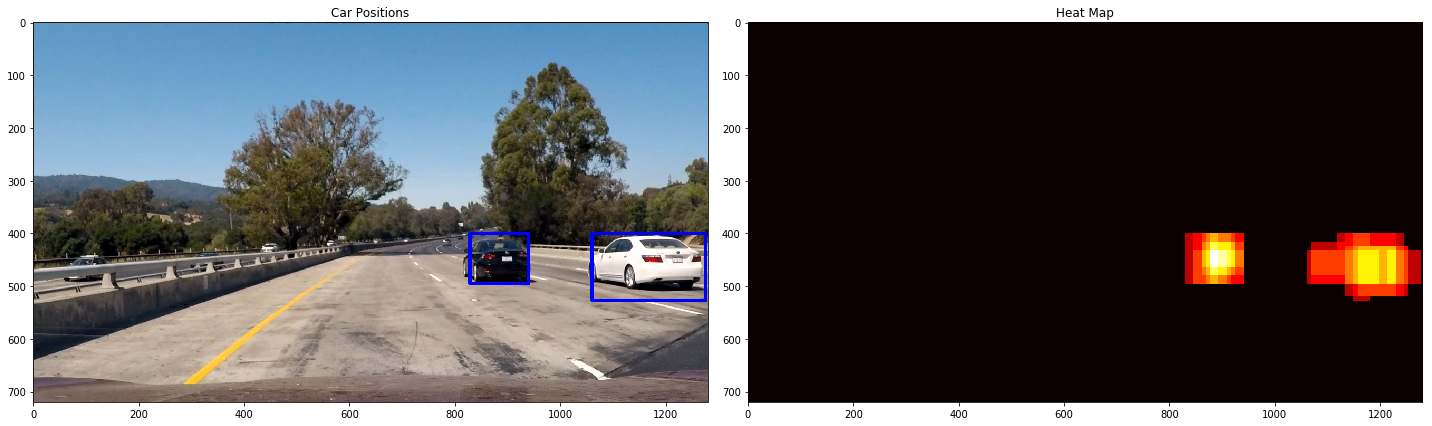

In [41]:
heat = np.zeros_like(img[:,:,0]).astype(np.float)
# Add heat to each box in box list
heat = add_heat(heat,boxes)
# Apply threshold to help remove false positives
heat = apply_threshold(heat,2)
# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)
# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(img), labels)

    
fig = plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()

/home/ryan/.conda/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


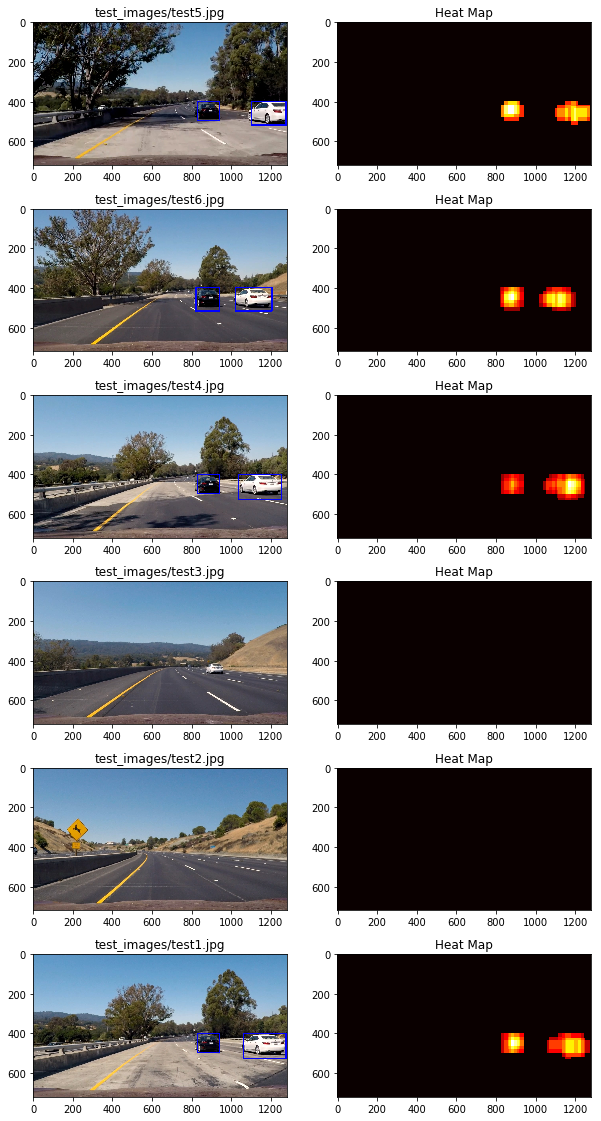

In [42]:
imgs = glob.glob('test_images/test*.jpg')

plt.figure(figsize=(10,20))
for i, im in enumerate(imgs):
    img = cv2.imread(im)[:,:,::-1]
    
    boxes = []
    scale = 1.0
    _, boxes_1_0 = find_cars(img, ystart, ystop, xstart, xstop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    scale = 1.5
    _, boxes_1_5 = find_cars(img, ystart, ystop, xstart, xstop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    scale = 2.0
    _, boxes_2_0 = find_cars(img, ystart, ystop, xstart, xstop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

    boxes += boxes_1_0
    boxes += boxes_1_5
    boxes += boxes_2_0
    
    heat = np.zeros_like(img[:,:,0]).astype(np.float)
    # Add heat to each box in box list
    heat = add_heat(heat,boxes)
    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,2)
    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)
    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(img), labels)

    plt.subplot(6,2,2*i+1)
    plt.imshow(draw_img)
    plt.title(im)
    plt.subplot(6,2,2*i+2)
    plt.imshow(heatmap, cmap='hot')
    plt.title('Heat Map')
    fig.tight_layout()
    
plt.savefig('output_images/bboxes_and_heat.png', bbox_inches='tight')

/home/ryan/.conda/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


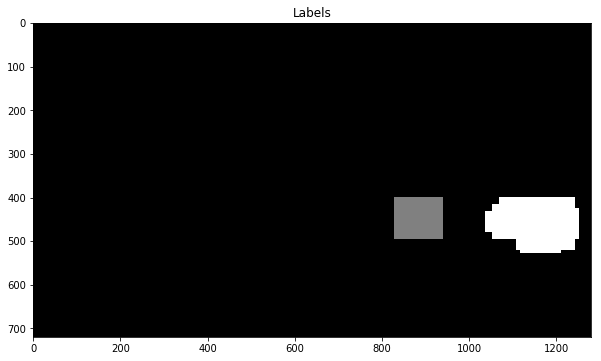

In [43]:
img = cv2.imread('test_images/test4.jpg')[:,:,::-1]

boxes = []
scale = 1.0
_, boxes_1_0 = find_cars(img, ystart, ystop, xstart, xstop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
scale = 1.5
_, boxes_1_5 = find_cars(img, ystart, ystop, xstart, xstop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
scale = 2.0
_, boxes_2_0 = find_cars(img, ystart, ystop, xstart, xstop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

boxes += boxes_1_0
boxes += boxes_1_5
boxes += boxes_2_0

heat = np.zeros_like(img[:,:,0]).astype(np.float)
# Add heat to each box in box list
heat = add_heat(heat,boxes)
# Apply threshold to help remove false positives
heat = apply_threshold(heat,2)
# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)
# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(img), labels)

plt.figure(figsize=(10,10))
plt.imshow(labels[0], cmap='gray')
plt.title('Labels')
fig.tight_layout()

plt.savefig('output_images/labels_map.png', bbox_inches='tight')

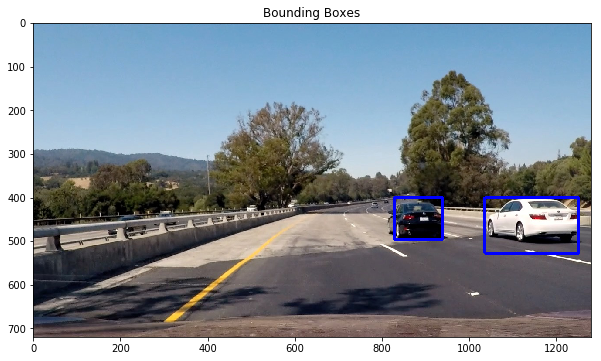

In [44]:
plt.figure(figsize=(10,10))
plt.imshow(draw_img, cmap='gray')
plt.title('Bounding Boxes')
fig.tight_layout()

plt.savefig('output_images/output_bboxes.png', bbox_inches='tight')

In [45]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [46]:
def process_image(image):
    global box_history

    boxes = []
    scale = 0.75
    _, boxes_0_75 = find_cars(image, 400, 500, xstart, xstop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    scale = 1.0
    _, boxes_1_0 = find_cars(image, 400, 500, xstart, xstop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    scale = 1.5
    _, boxes_1_5 = find_cars(image, 400, 550, xstart, xstop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    scale = 2.0
    _, boxes_2_0 = find_cars(image, 400, 700, xstart, xstop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

    boxes += boxes_0_75
    boxes += boxes_1_0
    boxes += boxes_1_5
    boxes += boxes_2_0
    
    if len(boxes)>0:
        box_history.append(boxes)
    
    heat = np.zeros_like(image[:,:,0]).astype(np.float)

    cache = 10
    if len(box_history)<cache:
        for boxes in box_history:
            # Add heat to each box in box list
            heat = add_heat(heat,boxes)

        # Apply threshold to help remove false positives
        heat = apply_threshold(heat,1+1.0*len(box_history))

        # Visualize the heatmap when displaying    
        heatmap = np.clip(heat, 0, 255)

        # Find final boxes from heatmap using label function
        labels = label(heatmap)
        result = draw_labeled_bboxes(np.copy(image), labels)
    else:
        for boxes in box_history[-cache:]:
            # Add heat to each box in box list
            heat = add_heat(heat,boxes)

        # Apply threshold to help remove false positives
        heat = apply_threshold(heat,1+1.0*cache)

        # Visualize the heatmap when displaying    
        heatmap = np.clip(heat, 0, 255)

        # Find final boxes from heatmap using label function
        labels = label(heatmap)
        result = draw_labeled_bboxes(np.copy(image), labels)
        
#     cv2.imwrite('output_images/im.png', result[:,:,::-1])
#     cv2.imwrite('output_images/im_og.png', image[:,:,::-1])
    return result

In [47]:
box_history = []

test_output = 'test_video_out.mp4'
# clip1 = VideoFileClip("test_video.mp4").subclip(0,10)
clip1 = VideoFileClip("test_video.mp4")
test_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time test_clip.write_videofile(test_output, audio=False)

# test_output = 'project_video_out.mp4'
# # clip1 = VideoFileClip("project_video.mp4").subclip(6,12)
# clip1 = VideoFileClip("project_video.mp4")
# test_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
# %time test_clip.write_videofile(test_output, audio=False)

[MoviePy] >>>> Building video test_video_out.mp4
[MoviePy] Writing video test_video_out.mp4


 97%|█████████▋| 38/39 [00:20<00:00,  1.85it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_video_out.mp4 

CPU times: user 21.6 s, sys: 154 ms, total: 21.8 s
Wall time: 21.7 s
